In [1]:
from IPython.display import HTML
import random

def hide_toggle(for_next=False,ttext="Code"):
    this_cell = """$('div.cell.code_cell.rendered.selected')"""
    next_cell = this_cell + '.next()'

    toggle_text = ttext  # text shown on toggle link
    target_cell = this_cell  # target cell to control with toggle
    js_hide_current = ''  # bit of JS to permanently hide code in current cell (only when toggling next cell)

    if for_next:
        target_cell = next_cell
        toggle_text += ' next cell'
        js_hide_current = this_cell + '.find("div.input").hide();'

    js_f_name = 'code_toggle_{}'.format(str(random.randint(1,2**64)))

    html = """
        <script>
            function {f_name}() {{
                {cell_selector}.find('div.input').toggle();
            }}

            {js_hide_current}
        </script>

        <a href="javascript:{f_name}()">{toggle_text}</a>
    """.format(
        f_name=js_f_name,
        cell_selector=target_cell,
        js_hide_current=js_hide_current, 
        toggle_text=toggle_text
    )

    return HTML(html)

hide_toggle(ttext="HTML Code")

In [4]:
import sys
sys.path
sys.path.append('/home/mshaaban/2019_Prelim_Analysis/')

from matplotlib import pyplot as plt
import numpy as np, sys, os
from astropy import units as u
import matplotlib
import copy as cp
import math
from scipy.optimize import curve_fit
from astropy.io import fits
import common_tools as ct 
from jupyterthemes import jtplot
jtplot.style(theme='monokai', grid = False)
#plt.style.use('dark_background')

base = "/data2/superbit_2019_flight/"
pre_base = "/data2/superbit_2019_preflight/"
    
bias_path = base + "BiasImages/"
flat_path = base + "FlatImages/"
science_path = base + "ScienceImages/"
dark_path = base + "DarkImages/"

pre_bias_path = pre_base + "BiasImages/"
pre_flat_path = pre_base + "FlatImages/"
pre_science_path = pre_base + "ScienceImages/"
pre_dark_path = pre_base + "DarkImages/"

flight_bias = np.array([bias for bias in os.listdir(bias_path) if ct.is_fits(bias) and os.stat(bias_path + bias).st_size > 59000000])
flight_dark = np.array([dark for dark in os.listdir(dark_path)if ct.is_fits(dark) and os.stat(dark_path + dark).st_size > 59000000])
flight_science = np.array([sci for sci in os.listdir(science_path)if ct.is_fits(sci) and os.stat(science_path + sci).st_size > 59000000])
flight_flats = np.array([flat for flat in os.listdir(flat_path) if ct.is_fits(flat)and os.stat(flat_path + flat).st_size > 59000000])

pre_flight_flats = np.array([flat for flat in os.listdir(pre_flat_path) if ct.is_fits(flat)and os.stat(pre_flat_path + flat).st_size > 59000000])
pre_flight_bias = np.array([bias for bias in os.listdir(pre_bias_path) if ct.is_fits(bias) and os.stat(pre_bias_path + bias).st_size > 59000000])
pre_flight_dark = np.array([dark for dark in os.listdir(pre_dark_path)if ct.is_fits(dark) and os.stat(pre_dark_path + dark).st_size > 59000000])
pre_flight_science = np.array([sci for sci in os.listdir(pre_science_path)if ct.is_fits(sci) and os.stat(pre_science_path + sci).st_size > 59000000])

print("Images Used:")
print(len(flight_flats),"flats used from flight")
print(len(flight_bias), "bias used from flight")
print(len(flight_dark), "darks used from flight")
print(len(flight_science), "sci images used from flight")
print()
print(len(pre_flight_flats), "flats used from ground")
print(len(pre_flight_bias), "bias used from ground")
print(len(pre_flight_dark), "darks used from ground")
print(len(pre_flight_science), "sci images used from ground")

hide_toggle(ttext="imports")

Images Used:
(19, 'flats used from flight')
(293, 'bias used from flight')
(90, 'darks used from flight')
(93, 'sci images used from flight')
()
(105, 'flats used from ground')
(243, 'bias used from ground')
(22, 'darks used from ground')
(151, 'sci images used from ground')


In [5]:
exptimes = []
ext_temps = []
int_temps = []
means = []
medians = []
stds = []
        
for img in flight_dark:
    with fits.open(dark_path + img) as hdul:
        exptimes.append(hdul[0].header["EXPTIME"])
        ext_temps.append(hdul[0].header["EXTTEMP"])
        int_temps.append(hdul[0].header["INTTEMP"])
        means.append(np.mean(hdul[0].data))
        medians.append(np.median(hdul[0].data))
        stds.append(np.std(hdul[0].data))
            
            
exptimes = np.array(exptimes)
ext_temps = np.array(ext_temps)
int_temps = np.array(int_temps)
means = np.array(means)
medians = np.array(medians)
stds = np.array(stds)

hide_toggle(ttext="Parameter Setup")

In [6]:
def plotimg(img,sig,title="",cb=True):
    mini =np.mean(img)-sig*np.std(img)
    maxi = np.mean(img)+sig*np.std(img)
    plt.figure(figsize=(14,8))
    plt.imshow(img,vmin=mini,vmax=maxi,cmap="viridis")
    if cb:
        plt.colorbar();
    plt.title(title);
    print(np.mean(img),np.std(img))
    
def plothist(img,title="",bins=10000,sig=1,nfig=True,label=""):
    m = np.mean(img)
    s = np.std(img)
    hist, edge = np.histogram(img,bins=bins)
    if nfig:
        plt.figure(figsize=(14,8))
    plt.plot(edge[1:],hist,label=label)
    plt.xlim([m-(sig*s),m+(sig*s)]);
    plt.title(title);
    plt.legend();
    print(m,s)
    
hide_toggle(ttext="Plotting Tools")

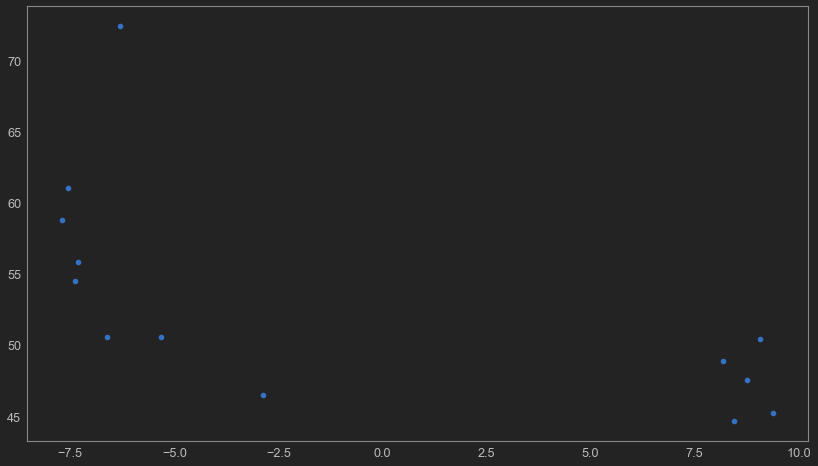

In [11]:
plt.figure(figsize=(14,8))
plt.plot(ext_temps[exptimes == 30000],stds[exptimes == 30000],"o")

In [12]:
dark = np.load("master_dark/mbias/master_dark_median_10_300000ms.npy")

(3.50900927567396, 168.88145370725914)
(3.50900927567396, 168.88145370725914)


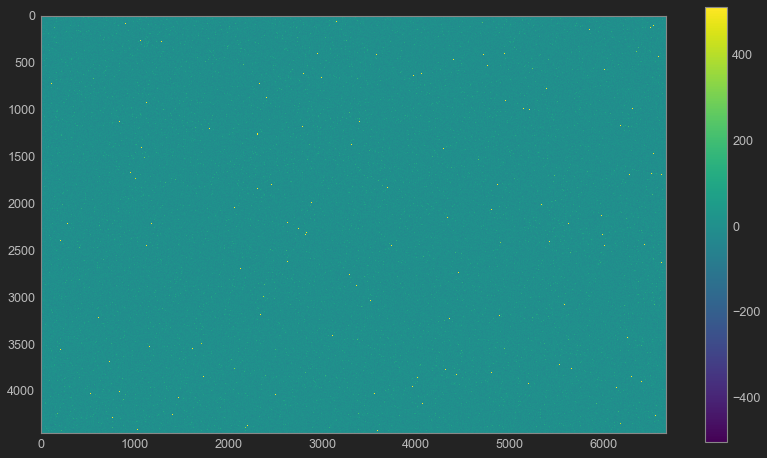

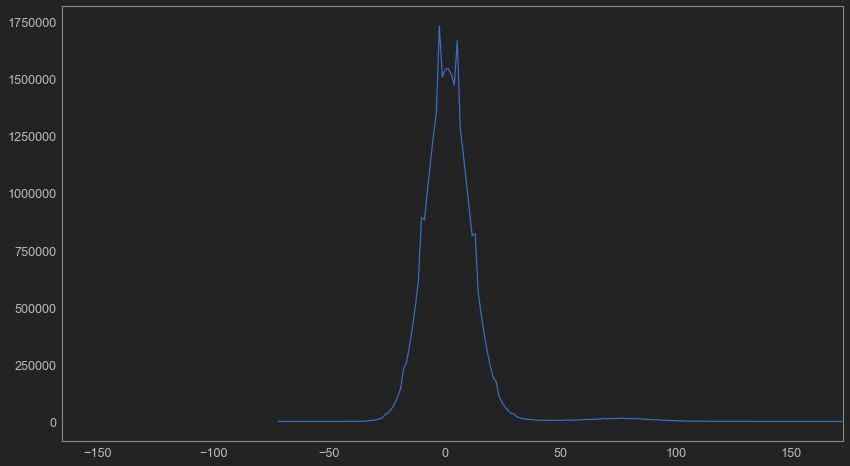

In [17]:
plotimg(dark,3)
plothist(dark,bins=50000)

In [21]:
np.std(dark[np.logical_and(dark > -50,dark<50)])

9.741636426732118

In [24]:
10/3.54

2.824858757062147

In [25]:
2.8/300

0.009333333333333332

(1067.1164275236786, 46.08118195295354)


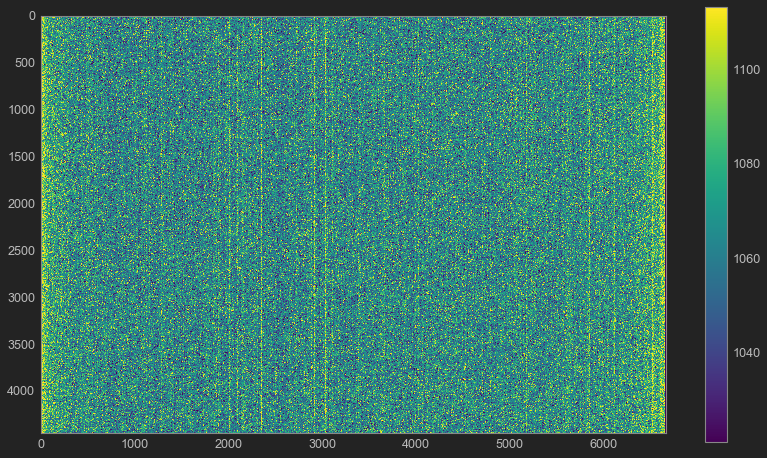

In [26]:
with fits.open(dark_path + flight_dark[12]) as hdule:
    img = hdul[0].data - 
    plotimg(img,1)

In [27]:
flight_dark[int_temps > -12]

array(['image_ifc_1568772268_94692_dark_20_2.fits',
       'image_ifc_1568776888_117787_dark_150_5.fits',
       'image_ifc_1568778472_125685_dark_10_6.fits',
       'image_ifc_1568777421_120452_dark_150_5.fits',
       'image_ifc_1568771201_89349_dark_30_1.fits',
       'image_ifc_1568787990_14645_dark.fits',
       'image_ifc_1568790230_25793_dark_10.fits',
       'image_ifc_1568777045_118569_dark_1_5.fits',
       'image_ifc_1568790156_25425_dark_20.fits',
       'image_ifc_1568777838_122529_dark_150_5.fits',
       'image_ifc_1568788076_15076_dark_20.fits',
       'image_ifc_1568773694_101830_dark_30_3.fits',
       'image_ifc_1568788382_16600_sci_0.1.fits',
       'image_ifc_1568775692_111801_dark_150_4.fits',
       'image_ifc_1568772195_94325_dark_10_2.fits',
       'image_ifc_1568775246_109580_dark_10_4.fits',
       'image_ifc_1568745221_9294_SCIIMG_NAME.fits',
       'image_ifc_1568779875_132675_dark_30_7.fits',
       'image_ifc_1568777636_121525_dark_1_5.fits',
       'imag